<a href="https://colab.research.google.com/github/raodnik/OE5510/blob/main/Term%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import xgboost as xg

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df =pd.read_csv('/content/drive/MyDrive/Datasets/ML TERM Data/Term Train ocean.csv')
df1=pd.read_csv('/content/drive/MyDrive/Datasets/ML TERM Data/Term Test Ocean.csv')

In [5]:
X_train, y_train = df[['TEMP', 'SALT']].values, df[['d5', 'd10', 'd30', 'd50', 'd100', 'd150', 'd200',
       'd300', 'd500', 'd700', 'd900', 'd1000', 'd1200']].values

X_test, y_test = df1[['TEMP', 'SALT']].values, df1[['d5', 'd10', 'd30', 'd50', 'd100', 'd150', 'd200',
       'd300', 'd500', 'd700', 'd900', 'd1000', 'd1200']].values

In [6]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

In [7]:
parameters = {'estimator__nthread':[4], #when use hyperthread, xgboost may become slower
              'estimator__objective':['reg:squarederror'],
              'estimator__learning_rate': [0.03, 0.05, 0.07, 0.15], #so called `eta` value
              'estimator__max_depth': [3, 4, 5, 6, 7],
              'estimator__min_child_weight': [2, 4],
              'estimator__silent': [1],
              'estimator__subsample': [0.7, 0.8],
              'estimator__colsample_bytree':[0.7],
              'estimator__n_estimators': [500]}
model = XGBRegressor()
reg_model = MultiOutputRegressor(model)

grid_result = GridSearchCV(reg_model,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)

In [8]:
grid_result.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MultiOutputRegressor(estimator=XGBRegressor()),
             n_jobs=-1,
             param_grid={'estimator__colsample_bytree': [0.7],
                         'estimator__learning_rate': [0.03, 0.05, 0.07, 0.15],
                         'estimator__max_depth': [3, 4, 5, 6, 7],
                         'estimator__min_child_weight': [2, 4],
                         'estimator__n_estimators': [500],
                         'estimator__nthread': [4],
                         'estimator__objective': ['reg:squarederror'],
                         'estimator__silent': [1],
                         'estimator__subsample': [0.7, 0.8]})

In [9]:
test_pred = grid_result.predict(X_test)

In [10]:
pred_df = pd.DataFrame(test_pred, columns =[['d5', 'd10', 'd30', 'd50', 'd100', 'd150', 'd200','d300', 'd500', 'd700', 'd900', 'd1000', 'd1200']])


In [11]:
depths =['d5', 'd10', 'd30', 'd50', 'd100', 'd150', 'd200', 'd300', 'd500', 'd700', 'd900', 'd1000', 'd1200']
col_df = pd.DataFrame(depths, columns=['depths'])

In [12]:
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

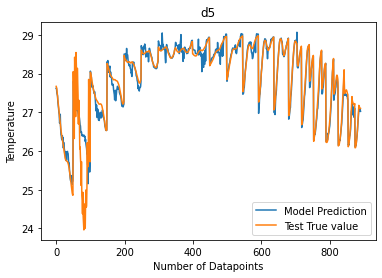

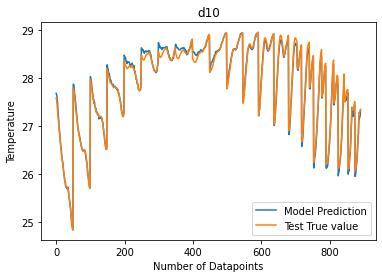

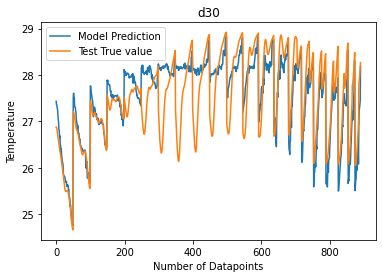

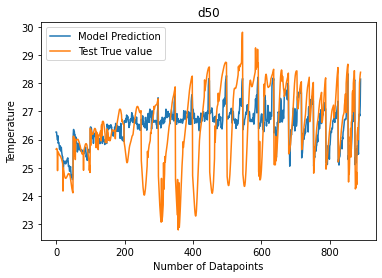

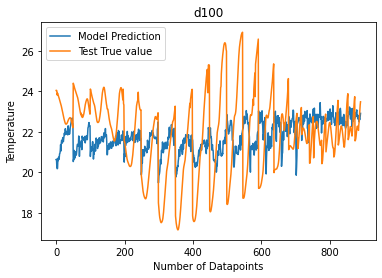

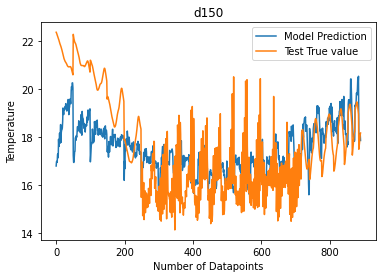

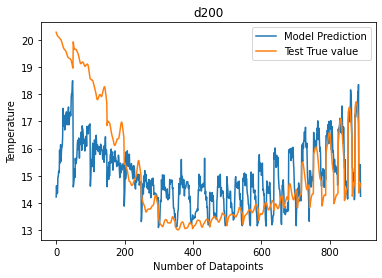

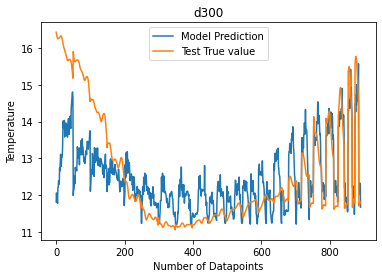

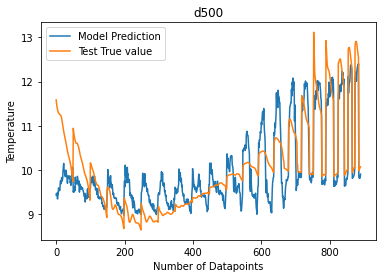

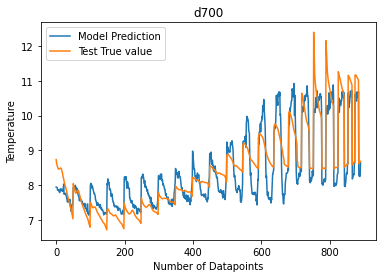

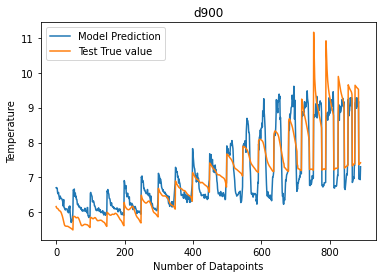

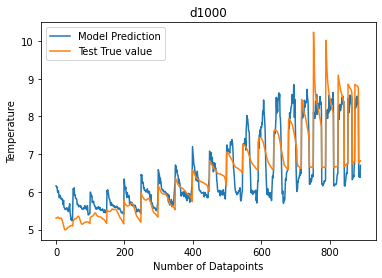

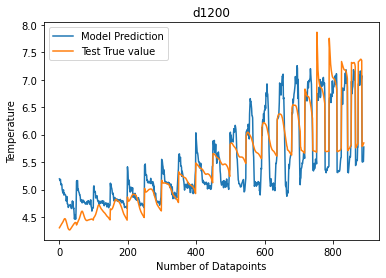

In [13]:
pred_depth={}
pred_df1={}
y_label1={}
for i in depths:
  pred_df1=pred_df[i]
  y_label1=df1[i]
  pred_depth = pd.concat([pred_df1,y_label1],axis=1)
  #print(pred_depth)
  pred_depth.plot()
  plt.title(i)
  plt.xlabel('Number of Datapoints')
  plt.ylabel('Temperature')
  plt.legend(['Model Prediction', 'Test True value'])

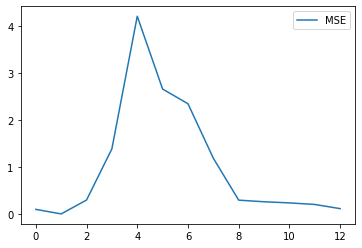

In [14]:
error_sq=[]
for i in depths:
  pred_df1=pred_df[i]
  y_label1=df1[i]
  mse=mean_squared_error(pred_df1, y_label1)
  #print("mse(",i,")=", mse)
  error_sq.append(mse)
error_sq_df=pd.DataFrame(error_sq, columns=['MSE'])
MSE_con = pd.concat([error_sq_df['MSE'], col_df['depths']],axis=1)
MSE_con.plot()

Rmse( d5 )= 0.3186726983011566
Rmse( d10 )= 0.07044146651325098
Rmse( d30 )= 0.5470859477474982
Rmse( d50 )= 1.1776314696651407
Rmse( d100 )= 2.0501498955604736
Rmse( d150 )= 1.6299782978084836
Rmse( d200 )= 1.5312363335629195
Rmse( d300 )= 1.089687974068623
Rmse( d500 )= 0.545264743850048
Rmse( d700 )= 0.5129105106258589
Rmse( d900 )= 0.489046997541492
Rmse( d1000 )= 0.4536431471521152
Rmse( d1200 )= 0.3420133436137655


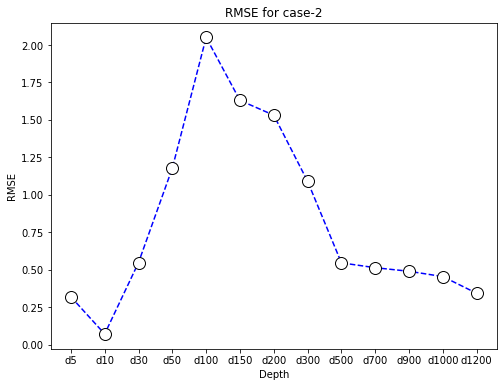

In [15]:
error=[]
for i in depths:
  pred_df1=pred_df[i]
  y_label1=df1[i]
  Rmse=np.sqrt(mean_squared_error(pred_df1, y_label1))
  #print("Rmse(",i,")=", Rmse)
  error.append(Rmse)
error_df = pd.DataFrame(error, columns=['RMSE'])
RMSE_con = pd.concat([error_df['RMSE'], col_df['depths']],axis=1)
plt.figure(figsize=(8, 6))
plt.plot(RMSE_con['depths'], RMSE_con['RMSE'],'--',marker='o', color='blue',
         markeredgecolor='black', markersize=12, markerfacecolor='white')
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.title('RMSE for case-2')
plt.show()
  

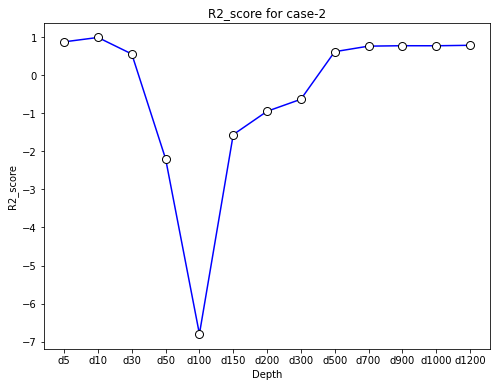

In [16]:
score = []
for i in depths:
  pred_df1=pred_df[i]
  y_label1=df1[i]
  Coeff_of_deter=r2_score(pred_df1, y_label1)
  #print("r2_score(",i,")=", Coeff_of_deter)
  score.append(Coeff_of_deter)
score_df = pd.DataFrame(score, columns=['R2_score'])
score_con = pd.concat([score_df['R2_score'], col_df['depths']],axis=1)
plt.figure(figsize=(8, 6))
plt.plot(RMSE_con['depths'], score_con['R2_score'],'-',marker='o', color='blue',
         markeredgecolor='black', markersize=8, markerfacecolor='white')
plt.xlabel('Depth')
plt.ylabel('R2_score')
plt.title('R2_score for case-2')
plt.show()